<a href="https://colab.research.google.com/github/DamaKubu/Fizikos-bakalauras/blob/main/OUprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ornstein-Uhlenbeck process simulation

```
#cia generuojamas trupmeninis OU procesas:


# where this second library is to generate fractional Gaussian noises

# integration time and time sampling
t_final = 2000
delta_t = 0.001

# Some drift theta and diffusion sigma parameters
theta = 0.3
sigma = 0.1

# The time array of the trajectory
time = np.arange(0, t_final, delta_t)

# The fractional Gaussian noise
H = 0.7
dB = (t_final ** H) * fgn(N = time.size, H = H)

# Initialise the array y
y = np.zeros([time.size])

# Integrate the process
for i in range(1, time.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i]
    
```

\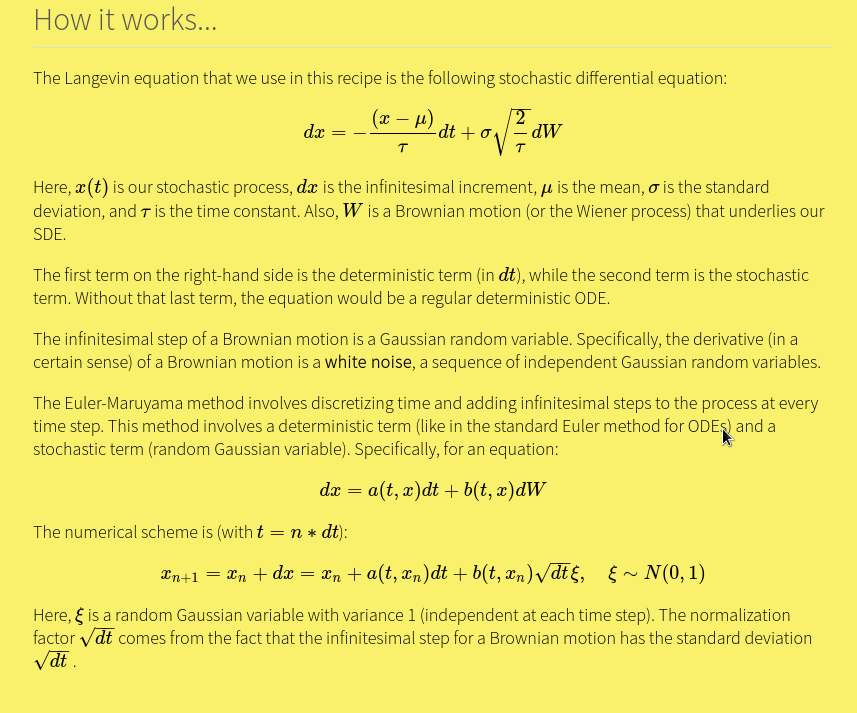

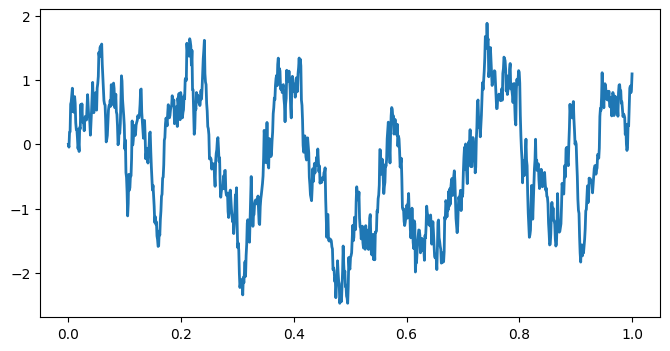

In [ ]:
#pagal https://ipython-books.github.io/134-simulating-a-stochastic-differential-equation/
#coocbook
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

#2.  We define a few parameters for our model:

sigma = 1.  # Standard deviation.
mu = 0.  # Mean.
tau = .05  # Time constant.

#3.  Let's define a few simulation parameters:

dt = .001  # Time step.
T = 1.  # Total time.
n = int(T / dt)  # Number of time steps.
t = np.linspace(0., T, n)  # Vector of times.

#4.  We also define renormalized variables
# (to avoid recomputing these constants at every time step):

sigma_bis = sigma * np.sqrt(2. / tau)
sqrtdt = np.sqrt(dt)

#5.  We create a vector that will contain all successive values of our process during the simulation:

x = np.zeros(n)

#6.  Now, let's simulate the process with the Euler-Maruyama method.
#It is really like the standard Euler method for ODEs,
# but with an extra stochastic term (which is just a scaled normal random variable).
# We will give the equation of the process along with the details of this method in the How it works... section:

for i in range(n - 1):
    x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
        sigma_bis * sqrtdt * np.random.randn()

#7.  Let's display the evolution of the process:

fig, ax = plt.subplots(1, 1, figsize=(8, 4))
ax.plot(t, x, lw=2)




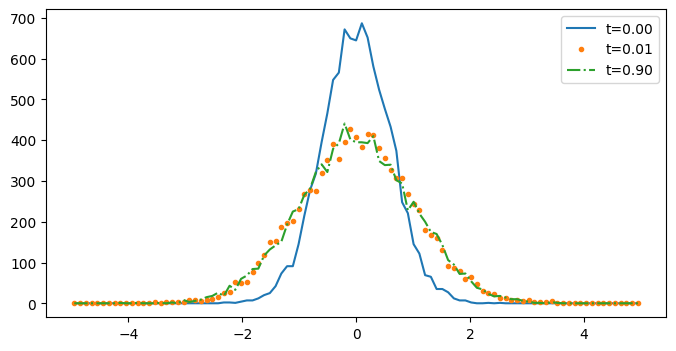

In [ ]:
#<matplotlib.figure.Figure at 0x70c65c0>

#8.  Now, we are going to take a look at the time evolution of the distribution of the process.
# To do this, we will simulate many independent realizations of the same process in a vectorized way.
# We define a vector X that will contain all realizations of the process at a given time (that is, we do not keep all realizations at all times in memory).
#This vector will be overwritten at every time step. We will show the estimated distribution (histograms) at several points in time:
mu = 0
ntrials = 10000
X = np.zeros(ntrials)

# We create bins for the histograms.
bins = np.linspace(-5., 5., 100)
fig, ax = plt.subplots(1, 1, figsize=(8, 4))

n = 10000
for i in range(n):
    # We update the process independently for
    # all trials
    X += dt * (-(X - mu) / tau) + sigma_bis * sqrtdt * np.random.randn(ntrials)
    # We display the histogram for a few points in
    # time
    if i in (10, 100, 9000):
        hist, _ = np.histogram(X, bins=bins)
        ax.plot((bins[1:] + bins[:-1]) / 2, hist,
                {10: '-', 100: '.', 9000: '-.', }[i],
                label=f"t={i /n:.2f}")
    ax.legend()

In [ ]:
#okay gan quick ir simple bet mes ne to norime
#Mes norime butent per kiek laiko viena realizacija pradės aproksimuoti
#normalųjį skirstinį, o ne kelios.

import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

def OUprocess(n = 1000, bins = []):
    sigma = 1.  # Standard deviation.
    mu = 0  # Mean. vadovas prašė 0, ir x0 = 0 automatiškai. šita gauname
    tau = .05  # Time constant.

    #Let's define a few simulation parameters:
    dt = 1/n
    #dt = .001  # Time step.
    T = 1.  # Total time.
    #n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.

    #4.  We also define renormalized variables
    # (to avoid recomputing these constants at every time step):

    sigma_bis = sigma * np.sqrt(2. / tau)
    sqrtdt = np.sqrt(dt)

    #5.  We create a vector that will contain all successive values of our process during the simulation:

    x = np.zeros(n)

    #6.  Now, let's simulate the process with the Euler-Maruyama method.
    #It is really like the standard Euler method for ODEs,
    # but with an extra stochastic term (which is just a scaled normal random variable).
    # We will give the equation of the process along with the details of this method in the How it works... section:

    for i in range(n - 1):
        x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) + \
            sigma_bis * sqrtdt * np.random.randn()

    #7.  Let's display the evolution of the process:

    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    ax[0].plot(t, x, lw=2)

    #ax[1]
    ax[0].set_title(f"OU procesas su 10^{math.log10(n)} žingsnių")
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("x(t)")
    ax[1].set_ylabel("kiekis")
    ax[1].set_xlabel("vertės")
    #if len(bins)<2:
    #    ax[1].hist(x, bins='auto')  # arguments are passed to np.histogram
    #else:
    #    ax[1].hist(x, bins=bins)

    #ax[1].set_xlim([-4,4])
    hist, bin_edges = norm_histogram(x, plot = False, bins = 30)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    ax[1].bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.7, color='blue')
    ax[1].set_title("Histograma")

NameError: name 'norm_histogram' is not defined

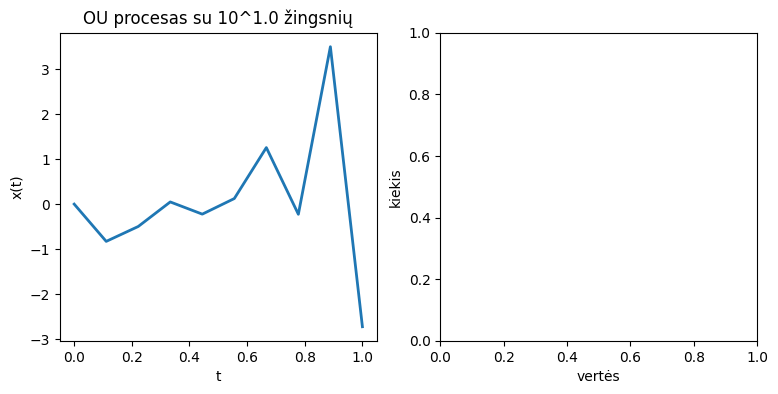

In [ ]:
import time


for p in [1,2,3,4,5,6]:
    start = time.time()
    OUprocess(n = 10**p)
    end = time.time()
    print(f"{end - start:3.3f} sekundžių truko 10^{p} taškai")



NameError: name 'norm_histogram' is not defined

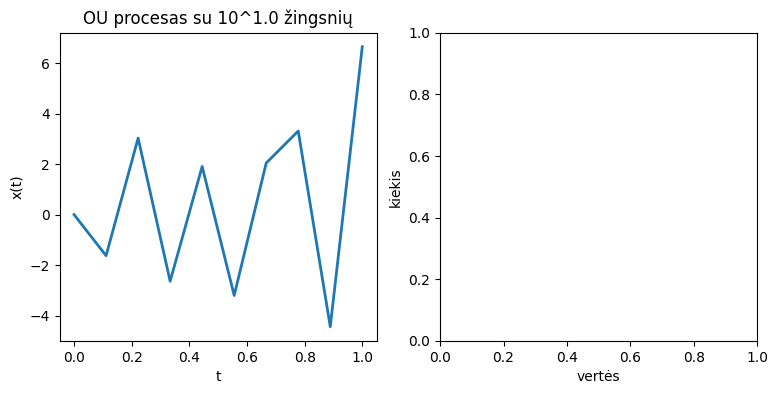

In [ ]:
import time


for p in [1,2,3,4,5,6]:
    start = time.time()
    OUprocess(n = 10**p)
    end = time.time()
    print(f"{end - start:3.3f} sekundžių truko 10^{p} taškai")

for p in [7,8]:
    start = time.time()
    OUprocess(n = 10**p)
    end = time.time()
    print(f"{end - start:3.3f} sekundžių truko 10^{p} taškai")

In [ ]:
for p in [7,8]:
    start = time.time()
    OUprocess(n = 10**p)
    end = time.time()
    print(f"{end - start:3.3f} sekundžių truko 10^{p} taškai")


In [ ]:
bins = np.linspace(-5., 5., 100)

for p in [1,2,3,4,5,6,7]:
    start = time.time()
    OUprocess(n = 10**p, bins = bins)
    end = time.time()
    print(f"{end - start:3.3f} sekundžių truko 10^{p} taškai")




## ** OU su biblioteka, gan sexy šita**
https://deeptime-ml.github.io/latest/datasets/plot_ornstein_uhlenbeck.html

In [ ]:
!pip install deeptime

import matplotlib.pyplot as plt


from deeptime.data import ornstein_uhlenbeck


xx = ornstein_uhlenbeck().trajectory([[0.]], 250).squeeze()




plt.plot(xx.squeeze())

plt.xlabel('t')

plt.ylabel('x(t)')

plt.show()


In [ ]:
def OUprocess2(p=3, bins = []):

    N = 10**p

    x = ornstein_uhlenbeck().trajectory([[0.]], N).squeeze()
    t = np.linspace(0, 1.0, N)

    fig, ax = plt.subplots(1, 2, figsize=(9, 4))
    ax[0].plot(t, x, lw=2)
    ax[0].set_title(f"OU procesas su 10^{p} žingsnių")
    ax[0].set_xlabel("t")
    ax[0].set_ylabel("x(t)")
    ax[1].set_ylabel("kiekis")
    ax[1].set_xlabel("vertės")
    #if len(bins)<2:
    #    ax[1].hist(x, bins='auto')  # arguments are passed to np.histogram
    #else:
    #    ax[1].hist(x, bins=bins)

    #ax[1].set_xlim([-4,4])
    hist, bin_edges = norm_histogram(x, plot = False, bins = 30)
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])

    ax[1].bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.7, color='blue')
    ax[1].set_title("Histograma")

In [ ]:
bins = np.linspace(-3., 3., 100)

for p in [1,2,3,4,5]:
    start = time.time()
    OUprocess2(p = p, bins = bins)
    end = time.time()
    print(f"{end - start:3.3f} sekundžių truko 10^{p} taškai")

#sita tikriausiai gera!
#pamirst tas bibliotekas euleurio morijamos x_t = x_t-1 + tas + kazkas

# BIBLIOTEKOS

In [ ]:
!pip install MFDFA
!pip install fbm

import numpy as np
import matplotlib.pyplot as plt
from math import log10
from MFDFA import MFDFA
from MFDFA import fgn




# normuoto skirstinio, bei loglog skirstinio vaizdavimo funkcijos
```
skirstinys()#kirmano
hist, bin_edges =    norm_histogram(xx, plot = True, bins = 30)
hist, bin_edges = log_log_histogram(xx, plot = True, bins = 30)
```

In [ ]:

def skirstinys(xx, e1, e2, N=100, k = 0.1, x_pradinis = 0, TT = 10000, bins = 40 ):

    fig, ax = plt.subplots(nrows=1, ncols=2,figsize=(7, 4))

    epsilonai = f"$\\epsilon_1 = ${e1:2.2f},   $\\epsilon_2 = ${e2:2.2f}"
    parametrai = f"\n N = {N}, $x_0$ = {x_pradinis}, iteracijos = {TT}"



    #xx
    ax[0].set_title(f"Gautas tikimybės skirstinys: "+epsilonai+parametrai)
    counts, bins = np.histogram(xx, bins = bins )
    ax[0].stairs(counts, bins)
    ax[0].set_xlabel("x")
    ax[0].set_ylabel("kiekis");

    #teorinis gamma
    C = 1/sc.beta(e1, e2)#m.gamma(e1+e2)/(m.gamma(e2)*m.gamma(e1))
    bb = np.linspace(0,1,100)

    ax[1].set_title(f"Teorinis tikimybės skirstinys:\n "+epsilonai)
    ax[1].plot(bb,C*bb**(e1-1)*(1-bb)**(e2-1));
    ax[1].set_xlabel("$\\frac{X}{N}$")
    ax[1].set_ylabel("P($\\frac{X}{N}$)");





def plot_normhist(xx, bins = 30, ax = 0, ribos = 'auto',*args, **kwargs):

    # Apskaičiuojame histogramą ir bin ribas
    hist, bin_edges = np.histogram(xx, bins=bins, density=True)

    # Skaičiuojame plotą po kreive, kad užtikrintume normalizavimą
    bin_centers = 0.5 * (bin_edges[:-1] + bin_edges[1:])
    hist_area = np.sum((bin_edges[1:] - bin_edges[:-1]) * hist)

    if ax == 0:
        fig, ax = plt.subplots(1,1, figsize = (4,3))

    ax.bar(bin_centers, hist, width=(bin_edges[1] - bin_edges[0]), alpha=0.8, color='#117711',*args, **kwargs)
    ax.set_xlabel('xx')
    ax.set_ylabel('PDF')


#naujas plotinimo protokolas
#do_something() ABT: Action but something Therefore do_something(). <3
#do_howwhat
#paduodu, xx, bins ir subploto axis ir galiu plotint viduje!
def plot_loghist(xx, bins = 30, ax = 0, neigiami = False, *args, **kwargs):
    #take out the 0's cuz log ain't defined
    xx = list(filter(lambda i: i != 0, xx))

    #split positive and negative parts
    #yes it's ugly, but it's more self contained..
    from collections import defaultdict

    d = defaultdict(list)

    for num in xx:
        if num < 0:
            d['neg'].append(num)
        else: # This will also append zero to the positive list, you can change the behavior by modifying the conditions
            d['pos'].append(num)



    if neigiami == True:
        xxn = np.array(d['neg'])*(-1)
        xxp = np.array(d['pos'])
        xx = np.concatenate((xxp,xxn), axis = 0)
    else:
        xx = d['pos']



    hist, bins = np.histogram(xx, bins=bins)
    logbins = np.logspace(np.log10(bins[0]),np.log10(bins[-1]),len(bins))


    #reiktu pirma normalizuot jog galeciau sakyti, kad cia itkimybe
    if ax == 0:
        fig, ax = plt.subplots(1,1, figsize = (4,3),layout='constrained')

    ax.hist(xx, bins=logbins, color = "#DC9F3B", *args, **kwargs)
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xlabel('log(xx)')
    ax.set_ylabel('log(DF)')



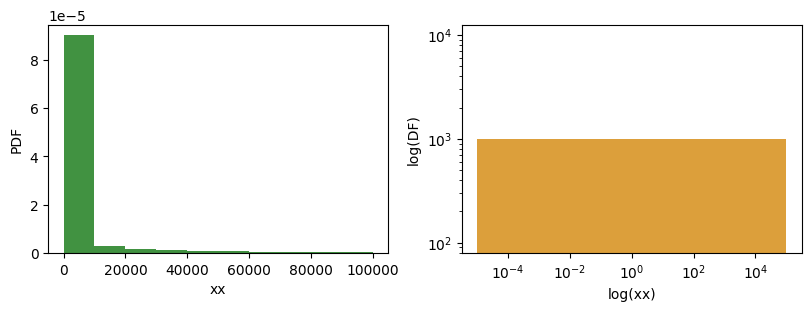

In [ ]:
xx = np.logspace(-5, 5, 10000)

#sharey = True share the same y axis
fig, ax = plt.subplots(1,2, figsize=(8,3),layout='constrained')
plot_normhist(xx, bins = 10, ax = ax[0])
plot_loghist(xx, ax = ax[1],bins = 10, neigiami = True)


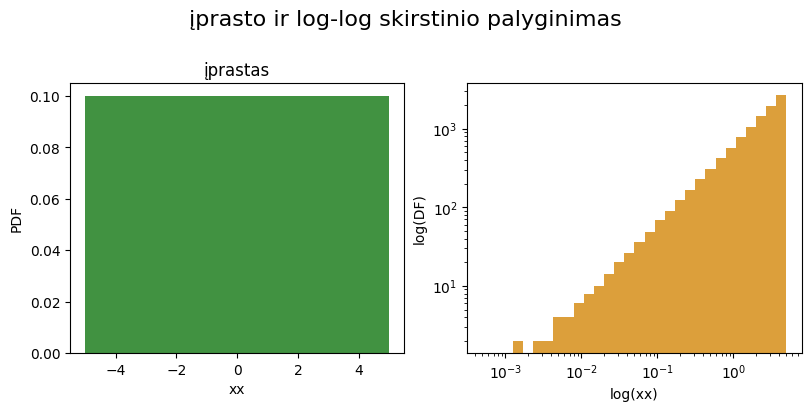

In [ ]:
xx = np.linspace(-5, 5, 10000)

#labai geras layout constrained daug ką išsprendžia
fig, ax = plt.subplots(1,2, figsize=(8,4),layout='constrained')
plot_normhist(xx, bins = 10, ax = ax[0])
plot_loghist(xx,ax = ax[1], neigiami = True)
fig.suptitle('įprasto ir log-log skirstinio palyginimas\n', fontsize=16);
ax[0].set_title('įprastas');


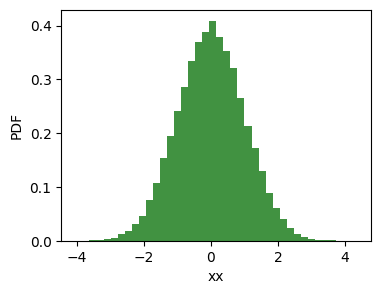

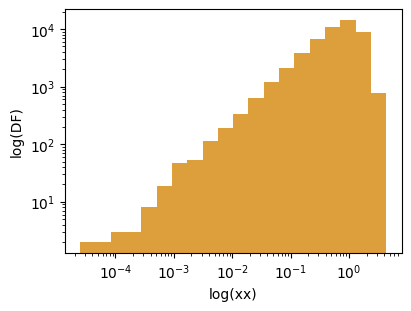

In [ ]:
xx = np.random.normal(0, 1, 100000)
plot_normhist(xx, bins = 40)
plot_loghist(xx, bins = 20)


In [ ]:
a = [1,0,-1]

xx = list(filter(lambda i: i != 0, xx))
a

# fbm su kraštinėm sąlygom


In [ ]:
#fuck abi bibliotekos neveik nes duoda vektoriu, o man po viena taskeli reik.
#fbm yra integralas FGN tai yra trupmeninio gausinio intergalas
#t.y. galiu tsg generuoti fgn su biblioteka ir ja integruot(sudet kumuliatyviai)
#problema, jog turiu krastines salygas.
#tad integruoju po viena ir jei užeinu iš krašto do something man:)






fGn max = 1.46504, dėžutės dyds = 2, generuojamas tamprus atspindėjimas.


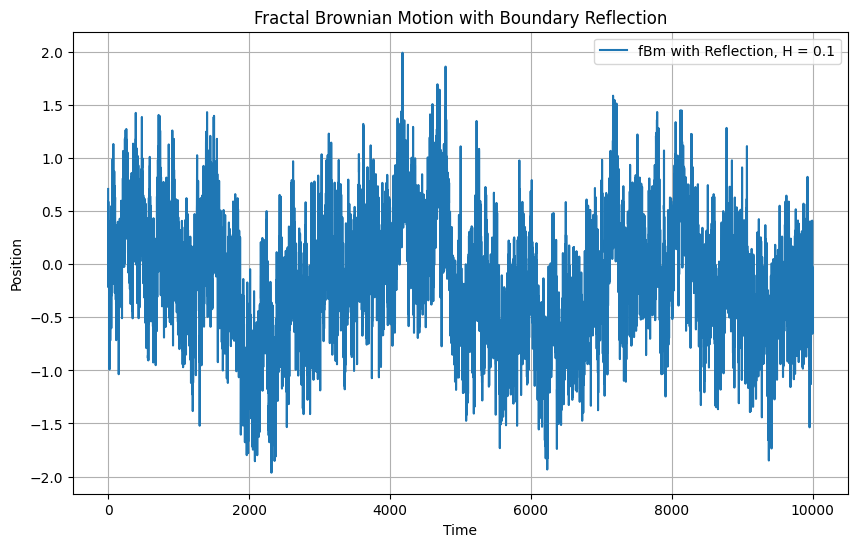

In [ ]:
def fbm_dezeje(H = 0.5, steps = 1000, box_size = 1, fgn_generator = 1, tamprus = False):
    #visiskai netamprus atspindejimas, nes su tampriu nelabai veik maza deze
    #tai nelabai veikia maza deze maziau 1, nes fgn meta daznai 1.5 siekanciu rezultatus...
    if fgn_generator == 1:
        aa = fgn(N = steps, H = H)

    elif fgn_generator == 2:
        #from fbm import times
        from fbm import fgn as fgn2

        # Generate a fGn realization
        aa = fgn2(n=steps, hurst=H, length=1, method='daviesharte')

        # Get the times associated with the fBm
        #t_values = times(n=1024, length=1)



    xx = []
    x  = 0
    sign = 1 #sita apversiu jei iseis is ribu pradesiu ne prideti o atimti

    if (tamprus == True) and (np.max(aa)<box_size):

        print(f"fGn max = {np.max(aa):2.5f}, dėžutės dyds = {box_size}, generuojamas tamprus atspindėjimas.")
        for a in aa:
            #galima protingiau sita implementuot
            #nes gi tik maza dali laiko realiai reik patikrint
            #dauguma laiko esam gan sure, jog krasto nekirs

            x += sign*a
            #print(f"x = {x:2.2f} < {box_size} = box, a = {a}" )
            if abs(x) >= box_size:
                #apverciam sign, jei sutampa paskutiniai a
                sign *= -1

                #tamprus, bet reik dezes_dydzio>max(fgn) = 2
                x += 2*sign*a #tamprus bet veik tik dezes dydziui virs 1.5

                if abs(x) > box_size:
                    print("fuck smth ain't working")

            xx.append(x)
    else:
        galima = "bet galima ir tamprų" if np.max(aa)<box_size else "tamprus negalimas"
        print(f"fGn max = {np.max(aa):2.2f}, dėžutės dyds = {box_size}, generuojamas netamprus atspindėjimas, " + galima)

        #generuojam fbm:
        for a in aa:
            #galima protingiau sita implementuot
            #nes gi tik maza dali laiko realiai reik patikrint
            #dauguma laiko esam gan sure, jog krasto nekirs

            x += sign*a
            #print(f"x = {x:2.2f} < {box_size} = box, a = {a}" )
            if abs(x) >= box_size:
                #apverciam sign, jei sutampa paskutiniai a
                sign *= -1

                #duslus
                x = sign*box_size

                if abs(x) > box_size:
                    print("fuck smth ain't working")

            xx.append(x)

    return xx

H = 0.1


# fBm generavimas
xx = fbm_dezeje(H=H, steps = 10000, box_size = 2, fgn_generator=1, tamprus = True)

# Rezultato vaizdavimas
plt.figure(figsize=(10, 6))
plt.plot(xx, label=f'fBm with Reflection, H = {H}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Fractal Brownian Motion with Boundary Reflection')
plt.legend()
plt.grid(True)
plt.show()
#lovely dbr dedam į tai kas mūms svarbu! testuojam Multifraktališkumą.


fGn max = 1.35, dėžutės dyds = 2, generuojamas netamprus atspindėjimas, bet galima ir tamprų


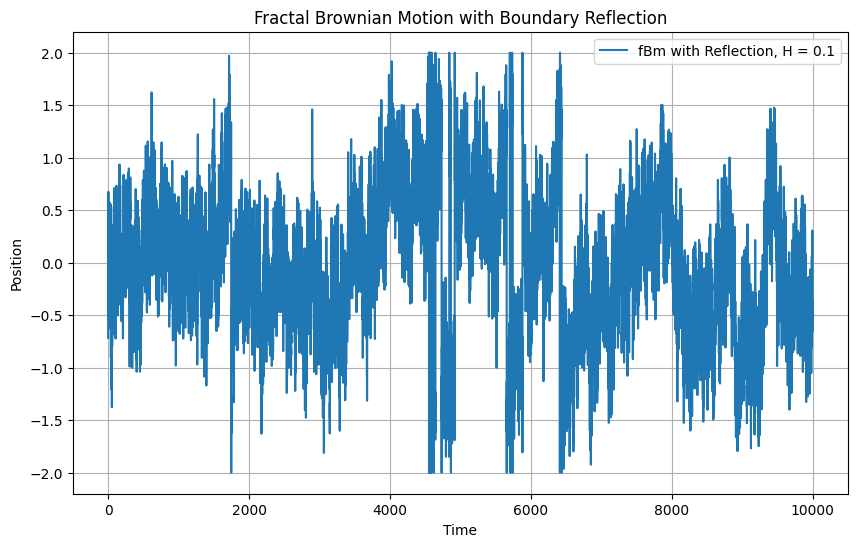

In [ ]:

# fBm generavimas
xx = fbm_dezeje(H=H, steps = 10000, box_size = 2, fgn_generator=1, tamprus = False)#(steps, H, delta_t, box_size)

# Rezultato vaizdavimas
plt.figure(figsize=(10, 6))
plt.plot(xx, label=f'fBm with Reflection, H = {H}')
plt.xlabel('Time')
plt.ylabel('Position')
plt.title('Fractal Brownian Motion with Boundary Reflection')
plt.legend()
plt.grid(True)
plt.show()
#lovely dbr dedam į tai kas mūms svarbu! testuojam Multifraktališkumą.

In [ ]:
from math import log10
from MFDFA import MFDFA
import math


def fbm_multi_mono(H=0.5, box_size = 10, steps = 10000, fgn_generator = 1, tamprus = False):

    # fBm generavimas
    xx = np.array(fbm_dezeje(steps=steps, H=H, box_size=box_size, fgn_generator = fgn_generator, tamprus = tamprus))


    #plotinimas ir multifraktališkumo paskaičiavimas
    fig, ax = plt.subplots(1,4, figsize=(16,3),layout='constrained')
    fig.suptitle(f'įvesties H = {H}, |dėžės dydis| = {box_size}, taškai = $10^{round(math.log10(steps))}$, tamprus = {tamprus}', fontsize=14, color = 'Green')

    #first plot, the data itself
    rodyk = 1000
    ax[0].plot(xx[:rodyk])
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('xx')
    ax[0].set_title(f'Pirmieji {rodyk} sekos taškai')

    #calculate and plot multifractality second plot
    # Select a band of lags, which usually ranges from
    # very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
    # Notice these must be ints, since these will segment
    # the data into chucks of lag size

    # The order of the polynomial fitting
    order = 1
    qq = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

    Hq = []
    for q in qq:
        # Obtain the (MF)DFA as
        lag, dfa = MFDFA(xx, lag = lag, q = q, order = order)
        # To uncover the Hurst index, lets get some log-log plots
        #plt.loglog(lag, dfa, '-', label='fOU: MFDFA q=2')

        # And now we need to fit the line to find the slope. Don't
        # forget that since you are plotting in a double logarithmic
        # scales, you need to fit the logs of the results
        H_hat = -1+np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
        Hq.append(H_hat)
        # Now what you should obtain is: slope = H + 1
        #print('Estimated H = '+'{:.3f}'.format(H_hat[0]))

    kiekPlotint = Hq.copy()
    kiekPlotint.append(0)
    kiekPlotint.append(1)
    ax[1].set_title('Multifraktališkumas')
    ax[1].set_xlabel("q")
    ax[1].set_ylim(-1,1)
    ax[1].set_ylabel("Hurst(q)")
    ax[1].scatter(qq, Hq,label= f"įvesties H = {H}", color = 'black')
    ax[1].grid(True)
    ax[1].legend()


    #plot normuota histogramą
    plot_normhist(xx, ax = ax[2], bins = 30)
    ax[2].set_title(f"Normuotas skirstinys")

    #plot log log histogramą
    plot_loghist(xx, ax = ax[3], bins = 10, neigiami = True)
    ax[3].set_title('log-log skirstinys')



    return xx

# FBM su kraštinėm rezultatai:

fGn max = 0.65, dėžutės dyds = 1, generuojamas netamprus atspindėjimas, bet galima ir tamprų
fGn max = 0.67, dėžutės dyds = 2, generuojamas netamprus atspindėjimas, bet galima ir tamprų
fGn max = 0.58, dėžutės dyds = 10, generuojamas netamprus atspindėjimas, bet galima ir tamprų
Pasikeičia H 
fGn max = 0.04, dėžutės dyds = 1, generuojamas netamprus atspindėjimas, bet galima ir tamprų
fGn max = 0.03, dėžutės dyds = 2, generuojamas netamprus atspindėjimas, bet galima ir tamprų
fGn max = 0.05, dėžutės dyds = 10, generuojamas netamprus atspindėjimas, bet galima ir tamprų
Pasikeičia H 
fGn max = 0.00, dėžutės dyds = 1, generuojamas netamprus atspindėjimas, bet galima ir tamprų
fGn max = 0.00, dėžutės dyds = 2, generuojamas netamprus atspindėjimas, bet galima ir tamprų
fGn max = 0.00, dėžutės dyds = 10, generuojamas netamprus atspindėjimas, bet galima ir tamprų


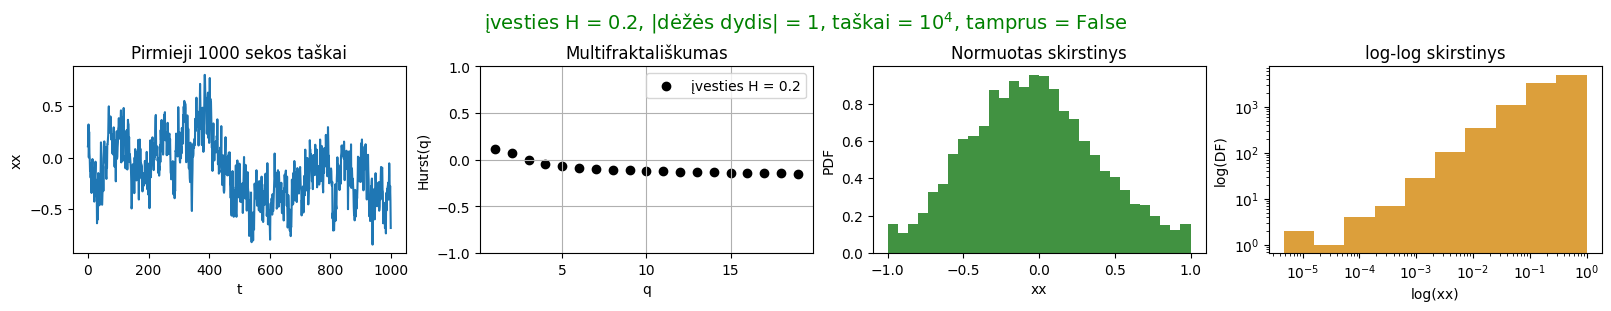

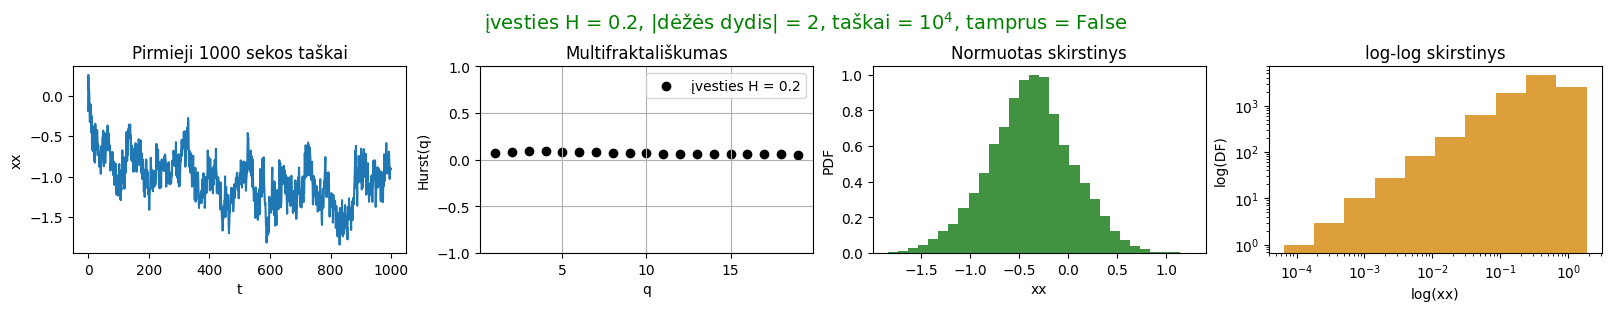

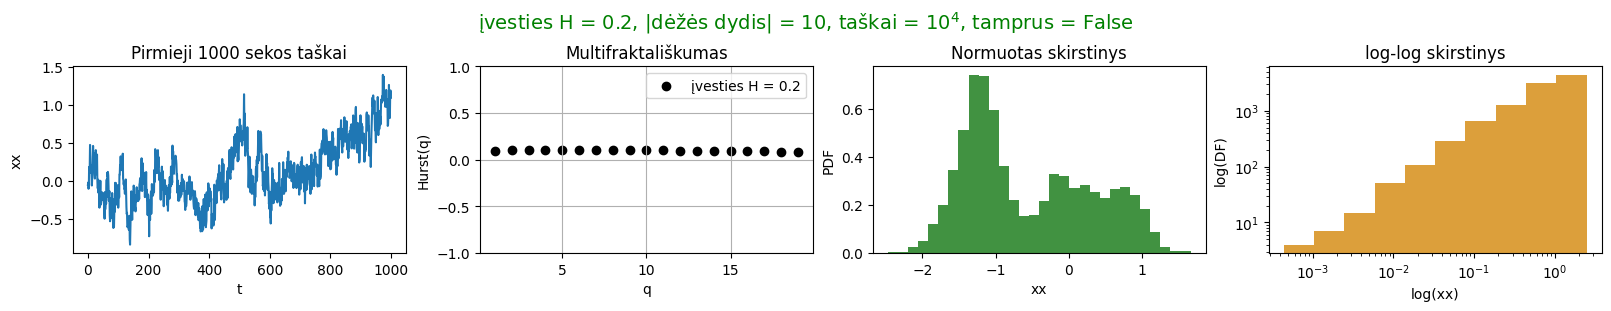

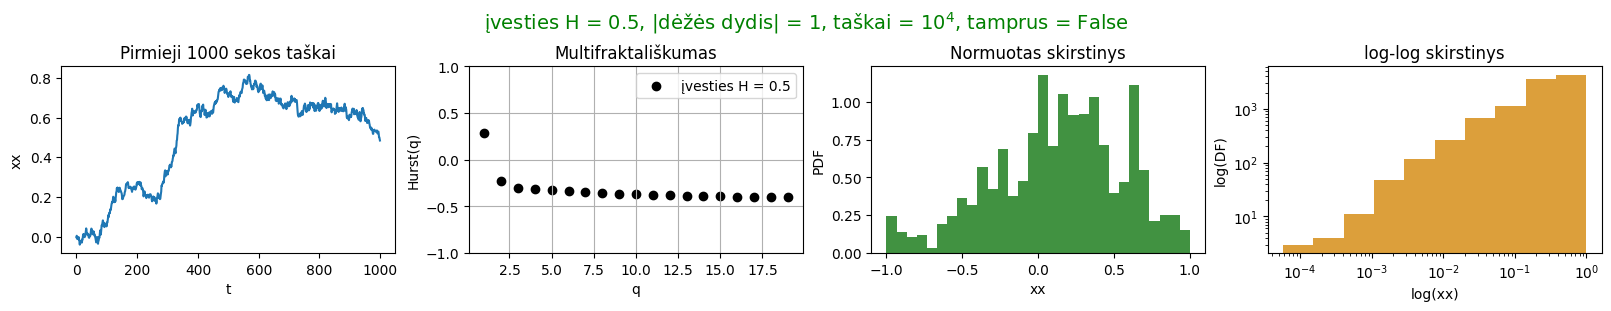

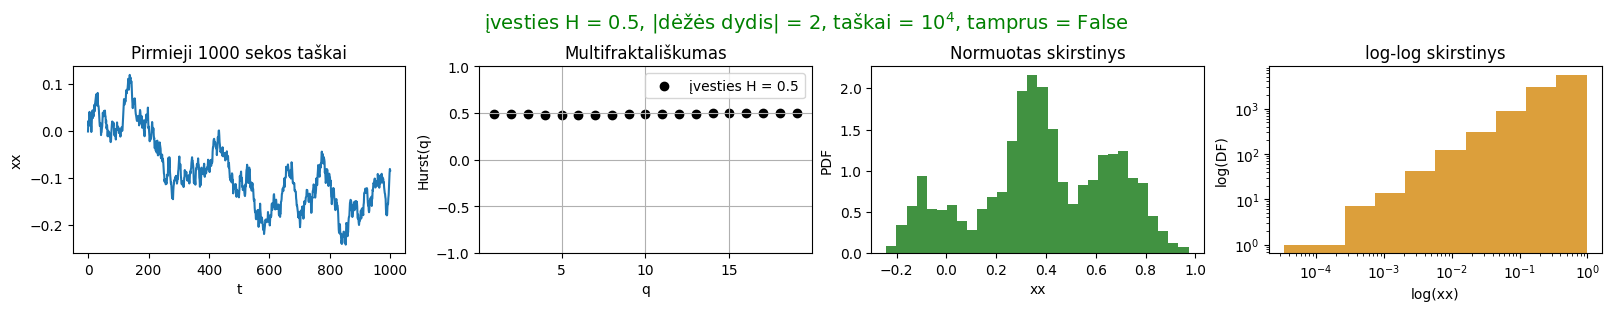

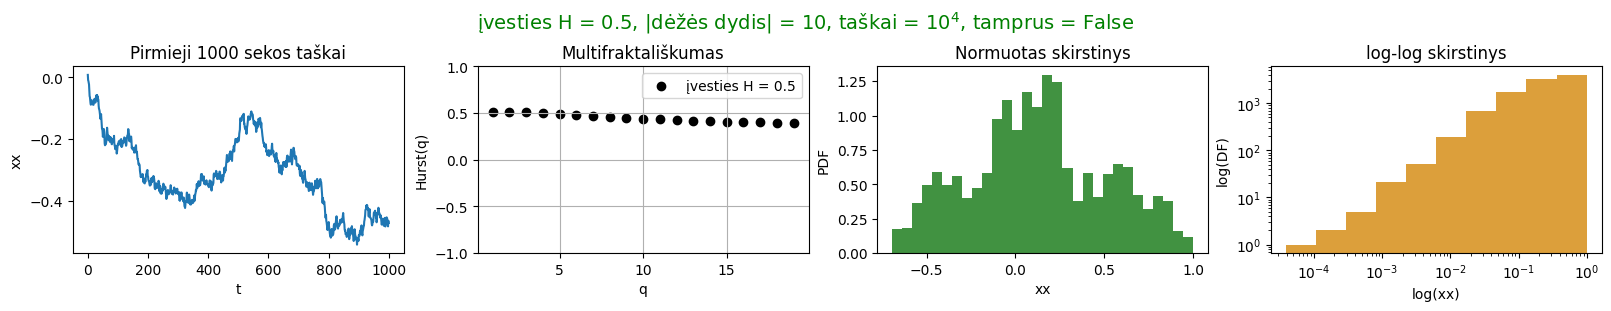

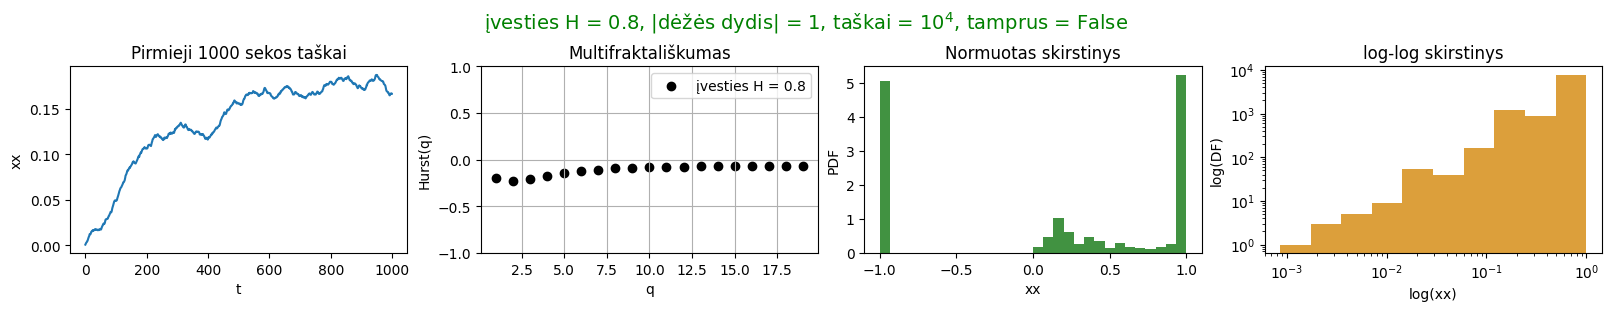

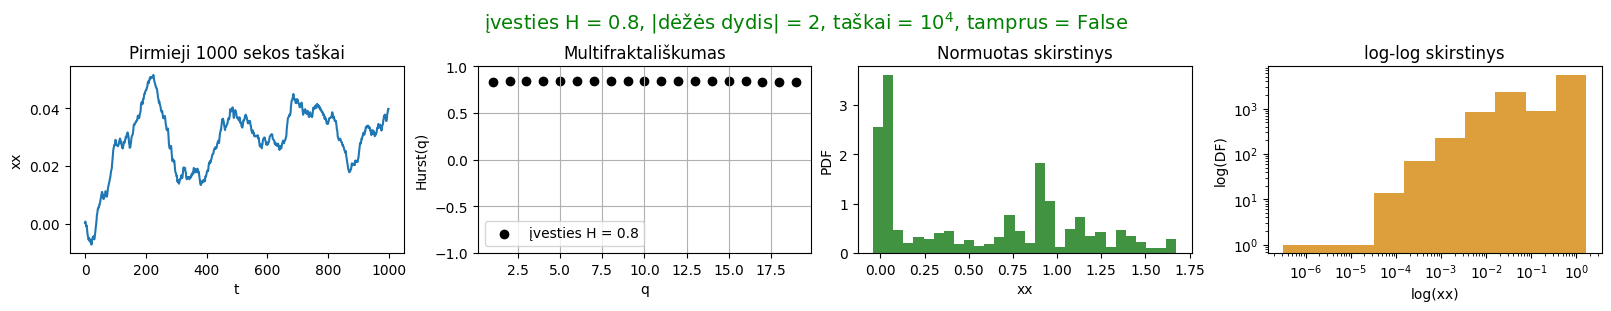

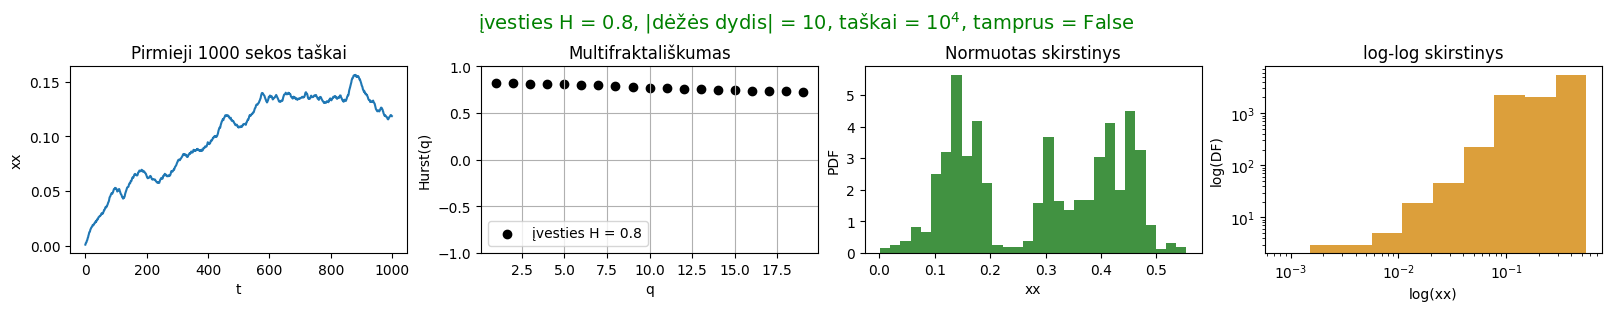

In [ ]:
def trys(h, tamprus = False):
    fbm_multi_mono(H = h, box_size=1,   steps = 10000, tamprus = tamprus)
    fbm_multi_mono(H = h, box_size=2,   steps = 10000, tamprus = tamprus)
    fbm_multi_mono(H = h, box_size=10,  steps = 10000, tamprus = tamprus)

trys(0.2)
print('=======================================================================')
print('Pasikeičia H ')
trys(0.5)
print('=======================================================================')
print('Pasikeičia H ')
trys(0.8)

Kas jei

In [ ]:
trys(0.2, tamprus = True)
print('=======================================================================')
print('Pasikeičia H ')
trys(0.5, tamprus = True)
print('=======================================================================')
print('Pasikeičia H ')
trys(0.8, tamprus = True)

In [ ]:
fbm_multi_mono(H = 0.1, box_size=0.1, steps = 10**6)

In [ ]:
fbm_multi_mono(H = 0.1, box_size=1, steps = 10**6)

NameError: name 'fbm_multi_mono' is not defined

In [ ]:
fbm_multi_mono(H = 0.1, box_size=0.5, steps = 10**6)

In [ ]:
fbm_multi_mono(H = 0.1, box_size=1, steps = 10**6)

In [ ]:
fbm_multi_mono(H = 0.8, box_size=0.01, steps = 10**6)

In [ ]:
fbm_multi_mono(H = 0.7, box_size=0.1, steps = 10**6, tamprus = True)

In [ ]:
#multifrakcionalumo rodiklis
def differentiate_vec(f_vec, a, b, n):
    """
    Compute the discrete derivative of a Python function
    f on [a,b] using n intervals. Internal points apply
    a centered difference, while end points apply a one-sided
    difference. Vectorized version.
    http://hplgit.github.io/pyhpc/doc/pub/._project001.html
    """
    n = n-1
    x = np.linspace(a, b, n+1)  # mesh
    df = np.zeros_like(x)       # df/dx
    f_vec = np.array(f_vec)

    dx = x[1] - x[0]
    # Internal mesh points
    df[1:-1] = (f_vec[2:] - f_vec[:-2])/(2*dx)
    # End points
    df[0]  = (f_vec[1]  - f_vec[0]) /dx
    df[-1] = (f_vec[-1] - f_vec[-2])/dx
    return df

for Hq in HHq:#calculate the D
    Hq = np.array(Hq).flatten()
    tau = qq*Hq - 1
    alfa = Hq + qq*differentiate_vec(Hq, qq[0], qq[-1], 40)
    D = qq*alfa - tau
    plt.scatter(alfa,D)

# Pirmadieniui

**Labai gerai.**
- fbM pakeisti, done.

- levy ta pati viska, done


- OU procesą, gamma = -x potencialą veikantį triukšmo, done

- Gražiai prifitinti OU procesas iš akies. doin.

- Parašyt gerą rašinį. Okay skaitau ir darau

- Diseratcija H = J + L  + N - 1 aprašyt aiškiai
- 4. kononovičiaus straipsnis. Resemblence of the power-law scaling behavior of a non markovian and nonlinear point process.
- difuzijos eksponentė bus susiju su mozės eksponentu

J + L + M


## **Levy-stable process*
Levy procesui padaryti ta patį, kaip ir fbm

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levy_stable.html


In [ ]:
import numpy as np
from scipy.stats import levy_stable
import matplotlib.pyplot as plt

def generate_levy_stable_process(alpha, beta, size=1000, delta=1.0):
    """
    Generuoja vienmatį Lévy stabilų procesą.

    Parametrai:
    - alpha: stabilumo indeksas (0 < alpha ≤ 2).
    - beta: simetrijos koeficientas (-1 ≤ beta ≤ 1).
    - size: procesą sudarančių žingsnių skaičius.
    - delta: žingsnio dydis.

    Grąžina:
    - process: numpy.ndarray, Lévy stabilus procesas.
    """
    # Sukuriamas tuščias procesas
    process = np.zeros(size)

    # Generuojami atsitiktiniai žingsniai iš Lévy stabilios distribucijos
    steps = levy_stable.rvs(alpha, beta, size=size)

    # Kumuliatyvinė suma generuojant procesą
    for i in range(1, size):
        process[i] = process[i-1] + steps[i] * delta

    return process

# Proceso parametrai
alpha = 1.5  # Stabilumo indeksas
beta = 0  # Simetrijos koeficientas



# Proceso generavimas
levy_process = generate_levy_stable_process(alpha, beta)

# Proceso vizualizacija
plt.plot(levy_process)
plt.title('Lévy Stable Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


#levy dėžėje
def levystable_dezeje(alfa, beta, steps=1000, delta=1.0, box_size = 1, tamprus = False, tstep=0.01):
    """
    Generuoja vienmatį Lévy stabilų procesą.

    Parametrai:
    - alpha: stabilumo indeksas (0 < alfa ≤ 2).
    - beta: simetrijos koeficientas (-1 ≤ beta ≤ 1).
    - size: procesą sudarančių žingsnių skaičius.
    - delta: žingsnio dydis. kaip ir su fbm tai tsg delta = 1

    Grąžina:
    - process: numpy.ndarray, Lévy stabilus procesas.
    """
    # Sukuriamas tuščias procesas
    process = np.zeros(steps)

    # Generuojami atsitiktiniai žingsniai iš Lévy stabilios distribucijos
    aa = levy_stable.rvs(alfa, beta, size=steps)

    print(f"max step = {max(aa*tstep)}")
    xx =[]
    x = 0
    sign = tstep
    #generuojam fbm:
    for a in aa:
        #galima protingiau sita implementuot
        #nes gi tik maza dali laiko realiai reik patikrint
        #dauguma laiko esam gan sure, jog krasto nekirs

        x += sign*a
        #print(f"x = {x:2.2f} < {box_size} = box, a = {a}" )
        if abs(x) >= box_size:
            #apverciam sign, jei sutampa paskutiniai a
            sign *= -1

            #duslus
            x = sign*box_size

            if abs(x) > box_size:
                print("fuck smth ain't working")

        xx.append(x)




    return xx

#levy multi fraktaliskumas




In [ ]:

# Proceso parametrai
alfa = 1.5  # Stabilumo indeksas
beta = 0  # Simetrijos koeficientas



# Proceso generavimas
levy_process = levystable_dezeje(alfa, beta, box_size = 0.1)

# Proceso vizualizacija
plt.plot(levy_process)
plt.title('Lévy Stable Process')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()


In [ ]:

def levy_multi(alfa = 1.5, beta = 0, box_size = 10, steps = 10000, tamprus = False):#, levy_generator = 1, tamprus = False):

    # fBm generavimas
    xx = np.array(levystable_dezeje(steps=steps, alfa = alfa, beta = beta, box_size=box_size, tamprus = tamprus))   #, fgn_generator = fgn_generator, tamprus = tamprus))


    #plotinimas ir multifraktališkumo paskaičiavimas
    fig, ax = plt.subplots(1,4, figsize=(16,3),layout='constrained')
    fig.suptitle(f"įvesties $alfa = {alfa}$, $beta = {beta}$  |dėžės dydis| = {box_size}, taškai = $10^{round(math.log10(steps))}$, tamprus = {tamprus}", fontsize=14, color = 'Green')

    #first plot, the data itself
    rodyk = 1000
    ax[0].plot(xx[:rodyk])
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('xx')
    ax[0].set_title(f'Pirmieji {rodyk} sekos taškai')

    #calculate and plot multifractality second plot
    # Select a band of lags, which usually ranges from
    # very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
    # Notice these must be ints, since these will segment
    # the data into chucks of lag size

    # The order of the polynomial fitting
    order = 1
    qq = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

    Hq = []
    for q in qq:
        # Obtain the (MF)DFA as
        lag, dfa = MFDFA(xx, lag = lag, q = q, order = order)
        # To uncover the Hurst index, lets get some log-log plots
        #plt.loglog(lag, dfa, '-', label='fOU: MFDFA q=2')

        # And now we need to fit the line to find the slope. Don't
        # forget that since you are plotting in a double logarithmic
        # scales, you need to fit the logs of the results
        H_hat = -1+np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
        Hq.append(H_hat)
        # Now what you should obtain is: slope = H + 1
        #print('Estimated H = '+'{:.3f}'.format(H_hat[0]))

    kiekPlotint = Hq.copy()
    kiekPlotint.append(0)
    kiekPlotint.append(1)
    ax[1].set_title('Multifraktališkumas')
    ax[1].set_xlabel("q")
    ax[1].set_ylim(-1,1)
    ax[1].set_ylabel("Hurst(q)")
    ax[1].scatter(qq, Hq, color = 'black')
    ax[1].grid(True)
    ax[1].legend()


    #plot normuota histogramą
    plot_normhist(xx, ax = ax[2], bins = 30)
    ax[2].set_title(f"Normuotas skirstinys")

    #plot log log histogramą
    plot_loghist(xx, ax = ax[3], bins = 10, neigiami = True)
    ax[3].set_title('log-log skirstinys')



    return xx

In [ ]:
levy_multi() # o gal padaryti klase biski patogiau butu, padaryciau parent klase
# o tada fbm ir levy procesui pakeisciau toks kompaktiskas ir grazus kodas
# bet oh well

In [ ]:
levy_multi(steps = 10**5, box_size =1)

In [ ]:
levy_multi(steps = 10**6, box_size = 1)

In [ ]:
levy_multi(alfa 1, beta 1, steps = 10**5, box_size = 1)

# OU potencinėje duobėje

- nelabai suprantu, ar jis jau auto yra potencinėj duobėj ar reikia pridėti papildomą narį.

NameError: name 'plot_normhist' is not defined

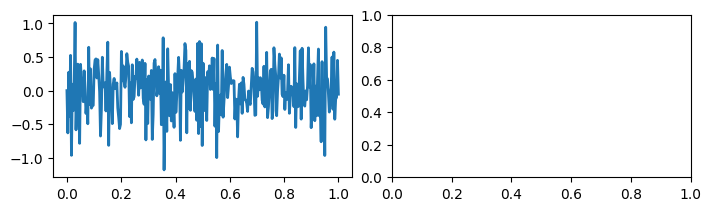

In [ ]:
import time
import numpy as np
import matplotlib.pyplot as plt



def generate_OU_well(potential = 0.5, steps = 1000, ax = 1 ):
    sigma = 1.  # Standard deviation.
    mu = 0.  # Mean.
    tau = .05  # Time constant.


    n = steps
    #3.  Let's define a few simulation parameters:
    #Let's define a few simulation parameters:
    dt = 1/n
    #dt = .001  # Time step.
    T = 1.  # Total time.
    #n = int(T / dt)  # Number of time steps.
    t = np.linspace(0., T, n)  # Vector of times.

    #4.  We also define renormalized variables
    # (to avoid recomputing these constants at every time step):

    sigma_bis = sigma * np.sqrt(2. / tau)
    sqrtdt = np.sqrt(dt)

    #5.  We create a vector that will contain all successive values of our process during the simulation:

    x = np.zeros(n)

    #6.  Now, let's simulate the process with the Euler-Maruyama method.
    #It is really like the standard Euler method for ODEs,
    # but with an extra stochastic term (which is just a scaled normal random variable).
    # We will give the equation of the process along with the details of this method in the How it works... section:

    x[0] = 0

    for i in range(n - 1):
        x[i + 1] = x[i] + dt * (-(x[i] - mu) / tau) +\
                    sigma_bis * sqrtdt * np.random.randn() - x[i]*potential
        #x[i + 1] = -x[i]*potential

    if ax == 1:
        fig, ax = plt.subplots(1, 1, figsize=(8, 4))
        ax.plot(t, x, lw=2)

    elif ax != 0:
        ax.plot(t, x, lw = 2)

    return x




fig, ax = plt.subplots(1, 2, figsize=(7,2), layout = "constrained")

xx = generate_OU_well(potential = 1.2, steps = 300, ax=ax[0])
plot_normhist(xx, ax=ax[1])



fig, ax = plt.subplots(1, 2, figsize=(7,2), layout = "constrained")

xx = generate_OU_well(potential = 1, steps = 300, ax=ax[0])
plot_normhist(xx, ax=ax[1])



fig, ax = plt.subplots(1, 2, figsize=(7,2), layout = "constrained")

xx = generate_OU_well(potential = 0.8, steps = 300, ax=ax[0])
plot_normhist(xx, ax=ax[1])

In [ ]:
#tik potencialas

fig, ax = plt.subplots(1, 2, figsize=(7,2), layout = "constrained")

xx = generate_OU_well(potential = 1.2, steps = 25, ax=ax[0])
plot_normhist(xx, ax=ax[1])



fig, ax = plt.subplots(1, 2, figsize=(7,2), layout = "constrained")

xx = generate_OU_well(potential = 1, steps = 30, ax=ax[0])
plot_normhist(xx, ax=ax[1])



fig, ax = plt.subplots(1, 2, figsize=(7,2), layout = "constrained")

xx = generate_OU_well(potential = 0.8, steps = 25, ax=ax[0])
plot_normhist(xx, ax=ax[1])

In [ ]:

def OU_multi(potential =0.5, steps = 10000):

    # generavimas
    xx = np.array(generate_OU_well(steps=steps, potential =0.5, ax = 0));   #, fgn_generator = fgn_generator, tamprus = tamprus))


    #plotinimas ir multifraktališkumo paskaičiavimas
    fig, ax = plt.subplots(1,4, figsize=(16,3),layout='constrained')
    fig.suptitle(f"potential = {potential}, taškai = $10^{round(math.log10(steps))}$", fontsize=14, color = 'Green')

    #first plot, the data itself
    rodyk = 1000
    ax[0].plot(xx[:rodyk])
    ax[0].set_xlabel('t')
    ax[0].set_ylabel('xx')
    ax[0].set_title(f'Pirmieji {rodyk} sekos taškai')

    #calculate and plot multifractality second plot
    # Select a band of lags, which usually ranges from
    # very small segments of data, to very long ones, as
    lag = np.unique(np.logspace(0.5, 3, 100).astype(int))
    # Notice these must be ints, since these will segment
    # the data into chucks of lag size

    # The order of the polynomial fitting
    order = 1
    qq = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]

    Hq = []
    for q in qq:
        # Obtain the (MF)DFA as
        lag, dfa = MFDFA(xx, lag = lag, q = q, order = order)
        # To uncover the Hurst index, lets get some log-log plots
        #plt.loglog(lag, dfa, '-', label='fOU: MFDFA q=2')

        # And now we need to fit the line to find the slope. Don't
        # forget that since you are plotting in a double logarithmic
        # scales, you need to fit the logs of the results
        H_hat = -1+np.polyfit(np.log(lag)[4:20],np.log(dfa[4:20]),1)[0]
        Hq.append(H_hat)
        # Now what you should obtain is: slope = H + 1
        #print('Estimated H = '+'{:.3f}'.format(H_hat[0]))

    kiekPlotint = Hq.copy()
    kiekPlotint.append(0)
    kiekPlotint.append(1)
    ax[1].set_title('Multifraktališkumas')
    ax[1].set_xlabel("q")
    ax[1].set_ylim(-1,1)
    ax[1].set_ylabel("Hurst(q)")
    ax[1].scatter(qq, Hq, color = 'black')
    ax[1].grid(True)


    #plot normuota histogramą
    plot_normhist(xx, ax = ax[2], bins = 30)
    ax[2].set_title(f"Normuotas skirstinys")

    #plot log log histogramą
    plot_loghist(xx, ax = ax[3], bins = 10, neigiami = True)
    ax[3].set_title('log-log skirstinys')

    return x

In [ ]:
OU_multi();

In [ ]:
OU_multi(potential = 0);
OU_multi(potential = 0.1);
OU_multi(potential = 0.5);
OU_multi(potential = 1);
OU_multi(potential = 1.5);

In [ ]:
#grazus prifitinimas
fig, ax = plt.subplots(1,2, figsize=(9,4))
xx=generate_OU_well(potential = 0, steps = 10**7, ax=ax[0]);
plot_normhist(xx, ax = ax[1])

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(9,4))
xx=generate_OU_well(potential = 0, steps = 10**9, ax=ax[0]);
plot_normhist(xx, ax = ax[1])
fig.suplot('OU procesas')

In [ ]:
# monty hall skirstinys


#monty hall


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Laimėjimai_keičiant = []

for i in range(100000):
    N = 10
    LaimėjimųSkaičius0 = 0

    pradinis_žaidėjo_pasirinkimas = np.random.choice(3, N)  #
    automobilis_durų_viduje = np.random.choice(3, N)  # lygiai pasirinkti automobilių pradinę vietą

    #nekeisti
    for pradinis, automobilis in zip(pradinis_žaidėjo_pasirinkimas, automobilis_durų_viduje):
        if pradinis == automobilis:
            LaimėjimųSkaičius0 += 1

    Laimėjimai_keičiant.append(LaimėjimųSkaičius0)

print('laimėjimai nekeičiant')
plot_normhist(Laimėjimai_keičiant, bins  = 15)


print(f"Laimėjimų dalis nekeičiant durų: {np.mean(Laimėjimai_keičiant) / N:.2f}")
#print(f"Laimėjimų dalis keičiant duris : {LaimėjimųSkaičius  / N:.2f}

In [ ]:
plot_normhist(Laimėjimai_keičiant, bins  = 10)


In [ ]:
np.mean(Laimėjimai_keičiant)
np.std(Laimėjimai_keičiant)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Laimėjimai_keičiant = []

for i in range(1000):
    N = 1000
    LaimėjimųSkaičius0 = 0

    pradinis_žaidėjo_pasirinkimas = np.random.choice(3, N)  #
    automobilis_durų_viduje = np.random.choice(3, N)  # lygiai pasirinkti automobilių pradinę vietą

    #nekeisti
    for pradinis, automobilis in zip(pradinis_žaidėjo_pasirinkimas, automobilis_durų_viduje):
        if pradinis == automobilis:
            LaimėjimųSkaičius0 += 1

    Laimėjimai_keičiant.append(LaimėjimųSkaičius0)

print('laimėjimai nekeičiant')
plot_normhist(Laimėjimai_keičiant, bins  = 10)


print(f"Laimėjimų dalis nekeičiant durų: {np.mean(Laimėjimai_keičiant) / N:.2f}")
#print(f"Laimėjimų dalis keičiant duris : {LaimėjimųSkaičius  / N:.2f

In [ ]:
np.std(Laimėjimai_keičiant)# ko ir tikėčiausi, nes čia vidurkio dispersija pirma saknis(10)= 3, kitas 300, tai 10 kartu skirtumsa

In [ ]:
#nice poisson skirstinys cia (vienoj puses didesnis kitoj mazesnis bet siaip normalu primena)

import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import poisson

# get random numbers that are poisson deviated
data_set = Laimėjimai_keičiant#np.random.poisson(4, 2000)

# the bins have to be kept as a positive integer because poisson is a positive integer distribution
bins = np.arange(10) - 0.5
entries, bin_edges, patches = plt.hist(data_set, bins=bins, density=True, label="Data")

# calculate bin centers
middles_bins = (bin_edges[1:] + bin_edges[:-1]) * 0.5


def fit_function(k, lamb):
    # The parameter lamb will be used as the fit parameter
    return poisson.pmf(k, lamb)


# fit with curve_fit
parameters, cov_matrix = curve_fit(fit_function, middles_bins, entries)

# plot poisson-deviation with fitted parameter
x_plot = np.arange(0, 15)

plt.plot(
    x_plot,
    fit_function(x_plot, *parameters),
    marker="D",
    linestyle="-",
    color="red",
    label="Fit result",
)
plt.legend()
plt.show()
#nelabai geas fitas,visgi galne poision.



In [ ]:
#noriu išvesti funkciją kuri duoda tikimybę, jog P(>=0.5), tai yra esant n žaidimo bandymų,
#kokia tikimybė jog nekeičiantis strategija laimės 50% ar daugiau kartų.
#
#P(nekeiciantis) = 1/3 = 0.333...
#tai is esmes metu biased moneta su arklys 2/3 ir centas 1/3 tikimybe
#kokia tikimybe esant n metimų jog išmesiu daugiau cento monetų?
import math
N = 10

#čia skirstinys bus:


skirstinys = [(1.0/3.0)**x * (2.0/3.0)**(N-x) for x in range(N)]

plt.plot(skirstinys)

In [ ]:
NN = [N for N in range(1, 100)]
PP = []

for N in NN:
    #čia x reiškia centą
    #forma gera, bet kodėl nesunormuotas
    skirstinys = np.array([((1.0/3.0)**x * (2.0/3.0)**(N-x))/(math.factorial(x)*math.factorial(N-x)) for x in range(N)])
    suma = np.sum(skirstinys)
    normuotas = 1/suma * np.array(skirstinys)
    #plt.plot(normuotas)
    #plt.plot([N//2, N//2, N//2], [0, 0.1, 0.2], color = 'red')
    if N%2 ==0:
        PP.append(np.sum(normuotas[N//2 :]))
    else:
        PP.append(np.sum(normuotas[(N-1)//2 :]))

plt.figure(figsize=(13,8))
plt.plot(NN, PP, color = "black")
plt.title('tikimybė, jog matematiškai bloga(laimi 1/3) strategija empiriškai bus lygi\n arba geresnė matematiškai gerai strategijai(2/3 laimi)  priklausomai nuo imties n')
plt.plot([0,50,100], [0.05, 0.05, 0.05], label = '5%')
plt.plot([0,50,100], [0.1, 0.1, 0.1], label = '10%', color = 'green')
plt.plot([0,50,100], [0.3, 0.3, 0.3], label = '30%', color = 'red')
plt.xticks(np.arange(0, 100+1, 5.0))
plt.yticks(np.arange(0, 1.05, 0.05))
plt.ylabel('P(n)')
plt.xlabel('n')
plt.grid(True)

In [ ]:
#haha su 30 bandymu, tai tikimybė blogai strategijai laimėti tėra 5%!! volia,
# manau užteks 30 bandymu, nors ir 10 bandymu duoda tik 30% tikimybe blogai strategijai laimėti

In [ ]:

#tas pats tik jo skirtingoj vietoj cia x reiškia arklį
skirstinys = [((1.0/3.0)**(N-x) * (2.0/3.0)**(x))/(math.factorial(x)*math.factorial(N-x)) for x in range(N)]

plt.plot(skirstinys)

Gal ir blogai, čia iš esmės, iš begalinės aibės {arklys, arklys, centas}



Kombinatoriškai.

tai imu imtį kad visi arkliai bus (2/3)^n
kad visi centai (1/3)^n




Imu po to pabandysiu išspręst.


In [ ]:
reik pasitikrint ar savipanašus, nes kitaip neveikia matematiniai metodai jiems skaičuoti??
Šitą noriu įsigilinti.

SyntaxError: invalid syntax (<ipython-input-3-7a016a9b1885>, line 1)